# Task 1

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Constants for data generation
n_students = 500
np.random.seed(42)  # Set seed for reproducibility

In [4]:
# Generate columns
student_data = {
    'student_id': np.arange(1, n_students + 1),
    'age': np.random.randint(15, 23, n_students),
    'study_hours': np.random.uniform(0, 40, n_students),
    'previous_gpa': np.random.uniform(2.0, 4.0, n_students),
    'extracurricular_activities': np.random.randint(0, 6, n_students),
    'gender': np.random.choice(['Male', 'Female'], n_students),
    'family_income': np.random.uniform(20000, 200000, n_students)
}

# Create final grade with some realistic dependencies
student_data['final_grade'] = (
    student_data['previous_gpa'] * 10 +  
    student_data['study_hours'] * 0.5 +  
    np.random.normal(0, 10, n_students)
).clip(0, 100)

In [5]:
#Convert data to a pandas DataFrame and save as CSV
df = pd.DataFrame(student_data)
df.to_csv("students.csv", index=False)

In [6]:
#Display the first few rows of the dataset
print("Dataset created successfully. Here's a preview:")
df.head()

Dataset created successfully. Here's a preview:


,student_id,age,study_hours,previous_gpa,extracurricular_activities,gender,family_income,final_grade
0,1,21,11.777956,2.233796,5,Male,42542.042678,24.456987
1,2,18,15.403909,3.879664,0,Female,105380.499783,52.256395
2,3,19,34.045467,3.255416,5,Male,40512.194249,60.340614
3,4,21,12.676880,2.669811,5,Female,107482.790536,38.960072
4,5,17,6.779710,2.278544,0,Male,185653.492619,19.472796


In [7]:
# Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 student_id                    0
age                           0
study_hours                   0
previous_gpa                  0
extracurricular_activities    0
gender                        0
family_income                 0
final_grade                   0
dtype: int64


In [8]:
# Statistical Summary
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        student_id        age  study_hours  previous_gpa  \
count  500.000000  500.00000   500.000000    500.000000   
mean   250.500000   18.53600    19.871017      3.016218   
std    144.481833    2.33315    11.711876      0.591555   
min      1.000000   15.00000     0.433506      2.009264   
25%    125.750000   17.00000     9.803437      2.474078   
50%    250.500000   18.00000    20.117133      3.054627   
75%    375.250000   21.00000    30.049877      3.537614   
max    500.000000   22.00000    39.988707      3.995868   

       extracurricular_activities  family_income  final_grade  
count                  500.000000     500.000000   500.000000  
mean                     2.490000  108547.918311    40.869306  
std                      1.733179   52741.062581    12.783291  
min                      0.000000   20033.911920     0.000000  
25%                      1.000000   60794.418940    32.442397  
50%                      3.000000  107747.506210    41.655399

In [9]:
# Data Types
print("\nData Types:\n", df.dtypes)


Data Types:
 student_id                      int32
age                             int32
study_hours                   float64
previous_gpa                  float64
extracurricular_activities      int32
gender                         object
family_income                 float64
final_grade                   float64
dtype: object


In [10]:
# Mean, Median, and Standard Deviation of `final_grade`
mean_final_grade = df["final_grade"].mean()
median_final_grade = df["final_grade"].median()
std_final_grade = df["final_grade"].std()
print(f"\nFinal Grade - Mean: {mean_final_grade}, Median: {median_final_grade}, Std Dev: {std_final_grade}")


Final Grade - Mean: 40.869305642232824, Median: 41.65539931313026, Std Dev: 12.78329075821721



Correlation Matrix:
                             student_id       age  study_hours  previous_gpa  \
student_id                    1.000000 -0.011331    -0.042069      0.069748   
age                          -0.011331  1.000000     0.020141     -0.007293   
study_hours                  -0.042069  0.020141     1.000000      0.013582   
previous_gpa                  0.069748 -0.007293     0.013582      1.000000   
extracurricular_activities   -0.040082  0.007771    -0.010662      0.043325   
family_income                 0.021363 -0.001698     0.073977     -0.024732   
final_grade                   0.009320  0.071540     0.434849      0.467843   

                            extracurricular_activities  family_income  \
student_id                                   -0.040082       0.021363   
age                                           0.007771      -0.001698   
study_hours                                  -0.010662       0.073977   
previous_gpa                                  0.04332

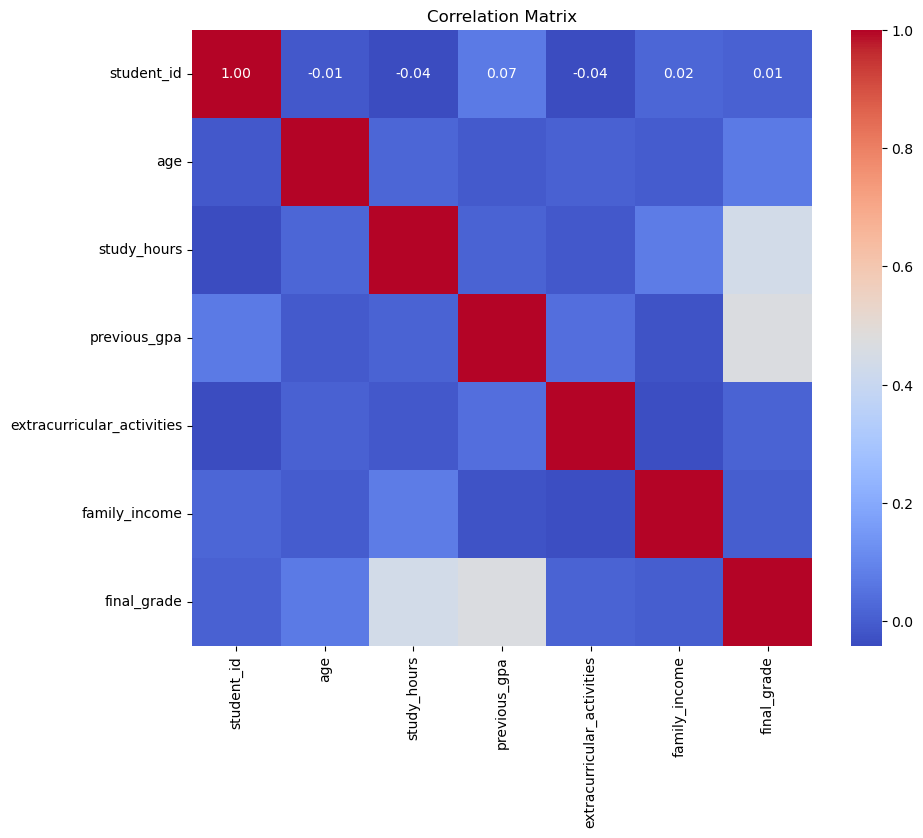

In [11]:
# Correlation matrix between numerical features
numerical_df = df.select_dtypes(include=["number"])  # Select only numeric columns
correlation_matrix = numerical_df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

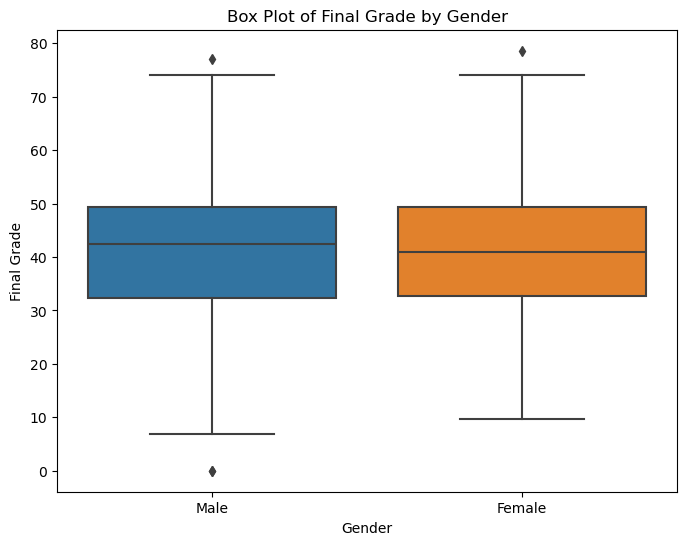

In [12]:
# Box plot of `final_grade` by `gender`
plt.figure(figsize=(8, 6))
sns.boxplot(x="gender", y="final_grade", data=df)
plt.title("Box Plot of Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Final Grade")
plt.show()

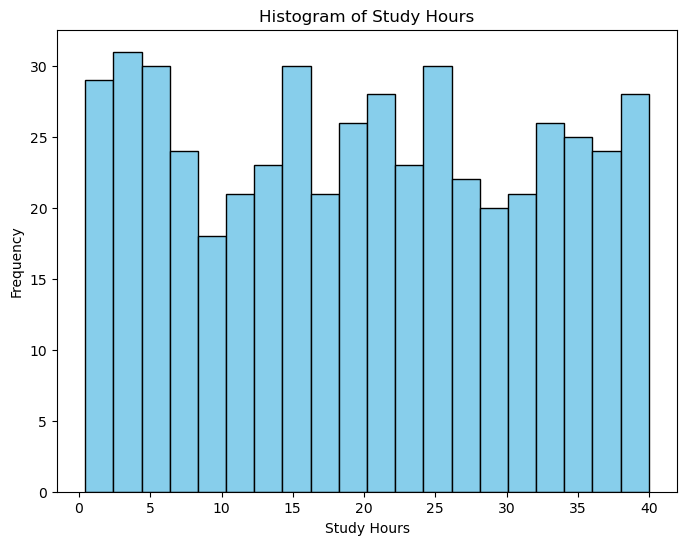

In [13]:
# Histogram of `study_hours`
plt.figure(figsize=(8, 6))
plt.hist(df["study_hours"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histogram of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Correlation between study hours and final grade
correlation_study_final = numerical_df["study_hours"].corr(numerical_df["final_grade"])
print(f"\nCorrelation between Study Hours and Final Grade: {correlation_study_final}")


Correlation between Study Hours and Final Grade: 0.43484933718724433


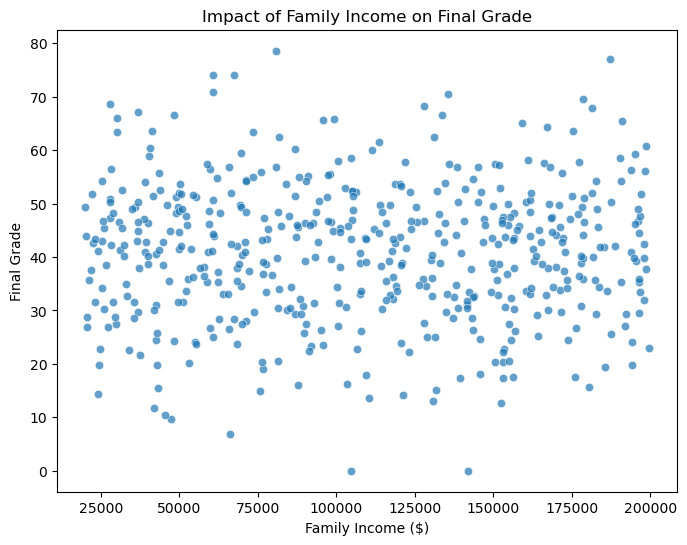

In [15]:
# Impact of family income on academic performance
plt.figure(figsize=(8, 6))
sns.scatterplot(x="family_income", y="final_grade", data=df, alpha=0.7)
plt.title("Impact of Family Income on Final Grade")
plt.xlabel("Family Income ($)")
plt.ylabel("Final Grade")
plt.show()


Mean Final Grade by Gender:
 gender
Female    40.583847
Male      41.181040
Name: final_grade, dtype: float64


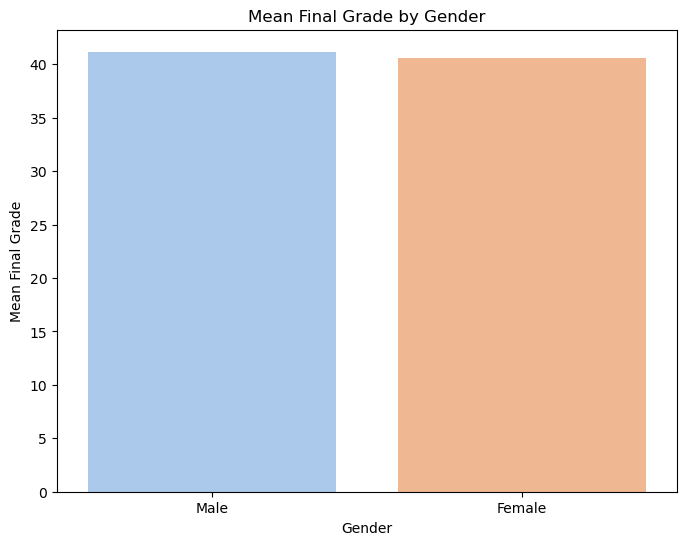

In [16]:
# Grade differences between genders
mean_grade_by_gender = df.groupby("gender")["final_grade"].mean()
print("\nMean Final Grade by Gender:\n", mean_grade_by_gender)
plt.figure(figsize=(8, 6))
sns.barplot(x="gender", y="final_grade", data=df, errorbar=None, palette="pastel")
plt.title("Mean Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Final Grade")
plt.show()

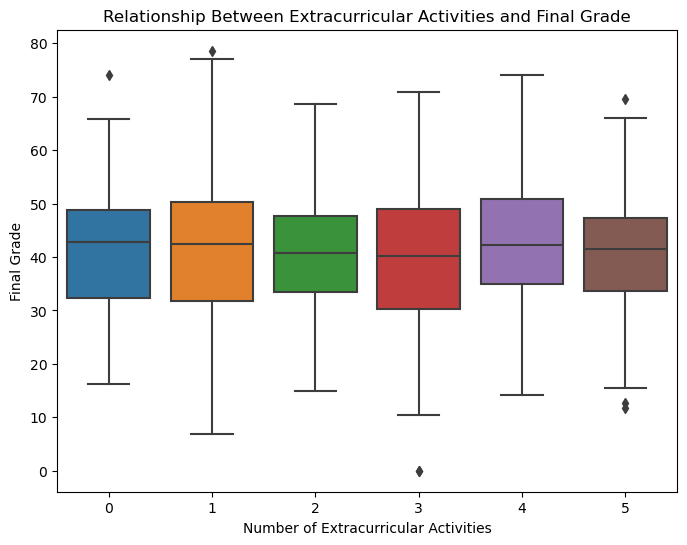

In [17]:
# Relationship between extracurricular activities and academic performance
plt.figure(figsize=(8, 6))
sns.boxplot(x="extracurricular_activities", y="final_grade", data=df)
plt.title("Relationship Between Extracurricular Activities and Final Grade")
plt.xlabel("Number of Extracurricular Activities")
plt.ylabel("Final Grade")
plt.show()